<a href="https://colab.research.google.com/github/DiegoLLP123/upsrj-keras-workspace/blob/main/CNN_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Convolucional con Keras para detección de perros
## Objetivo
Implementar una red neuronal convolucional que nos permita procesar imagenes para detectar a qué clase pertenecen, específicamente, necesitamos a diferenciar entre perros y gatos.

In [192]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from dataclasses import dataclass

1. **Cargar y preparar los datos**

Usaremos el data set de ejemplo de [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html), el cual incluye 60000 imágenes a color de 32x32 en 10 clases, con 6000 imágenes por clase.

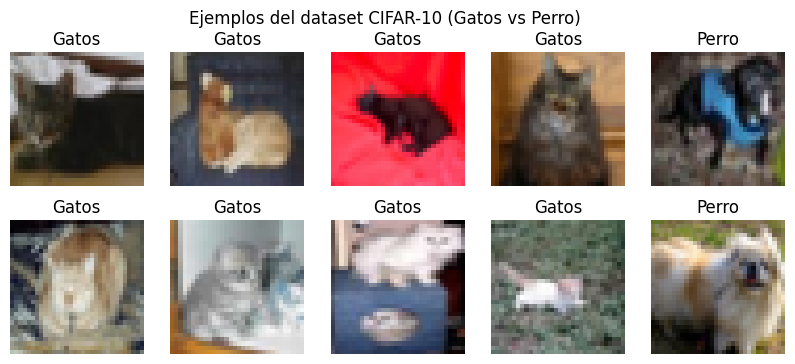

In [193]:
# cargamos base de datos de imagenes y dividimos en train data & test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# estructura de datos
@dataclass
class gatos:
  id: int = 3
  label: str = "Gatos"

@dataclass
class perros:
  id: int = 5
  label: str = "Perro"

deseado = perros
no_deseado = gatos

# clases: 3 = gato, 5 = perro
mask_train = (y_train.flatten() == gatos.id) | (y_train.flatten() == perros.id)
mask_test = (y_test.flatten() == gatos.id) | (y_test.flatten() == perros.id)

# filtramos de la base de datos las clases deseadas
x_train, y_train = x_train[mask_train], y_train[mask_train]
x_test, y_test = x_test[mask_test], y_test[mask_test]

# normalización (0,1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# convertimos etiquetas: gato = 0, perro = 1
y_train = (y_train == deseado.id).astype(int)
y_test = (y_test == deseado.id).astype(int)

# visualización de imágenes
fig, axes = plt.subplots(2, 5, figsize=(10,4))
for i, ax in enumerate(axes.flat):
  ax.imshow(x_train[i])
  ax.set_title(deseado.label if y_train[i] == 1 else no_deseado.label)
  ax.axis("off")
plt.suptitle(f"Ejemplos del dataset CIFAR-10 ({no_deseado.label} vs {deseado.label})")
plt.show()

2. **Ejecución con DNN (poco eficiente)**

En este caso específico no es eficiente utilizar una DNN para el análisis de nuestros datos, esto debido a que el formato de los datos es de imágenes de 32x32 RGB, lo cual se traduce a 3072 neuronas por imágen, lo cual dado el número de entradas (50000) nos da en total 153,600,000 neuronas necesarias.

In [185]:
# Modelo DNN
model_dnn = Sequential()

# Input layer
model_dnn.add(Flatten(input_shape=(32,32,3)))
# Hidden layers
model_dnn.add(Dense(128, activation='relu'))
# Output layer
model_dnn.add(Dense(1, activation='sigmoid'))

# compilamos DNN
model_dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# alimentamos DNN
history_dnn = model_dnn.fit(x_train, y_train, epochs=5, batch_size=64,
                            validation_data=(x_test, y_test), verbose=1)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5231 - loss: 0.8920 - val_accuracy: 0.5460 - val_loss: 0.6967
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5731 - loss: 0.6724 - val_accuracy: 0.5635 - val_loss: 0.6733
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5875 - loss: 0.6669 - val_accuracy: 0.5725 - val_loss: 0.6790
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5909 - loss: 0.6662 - val_accuracy: 0.5920 - val_loss: 0.6664
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5934 - loss: 0.6632 - val_accuracy: 0.5560 - val_loss: 0.6931


3. **Ejecución con CNN**

Dado el formato de los datos de entrada mencionados anteriormente, haremos una red neuronal convolucional (CNN) para el análisis.

In [194]:
# Modelo CNN
model_cnn = Sequential()

# Input layer
model_cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
# Hidden layers
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(Conv2D(64, (3,3), activation='relu'))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.5))

# Output layer (corregido)
model_cnn.add(Dense(1, activation='sigmoid'))

# Compilamos CNN
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamos CNN (corregido)
history_cnn = model_cnn.fit(x_train, y_train, epochs=5, batch_size=64,
                            validation_data=(x_test, y_test), verbose=1)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5533 - loss: 0.6857 - val_accuracy: 0.6525 - val_loss: 0.6254
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6555 - loss: 0.6248 - val_accuracy: 0.6740 - val_loss: 0.5900
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6978 - loss: 0.5732 - val_accuracy: 0.7225 - val_loss: 0.5420
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7300 - loss: 0.5400 - val_accuracy: 0.7270 - val_loss: 0.5417
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7428 - loss: 0.5132 - val_accuracy: 0.7345 - val_loss: 0.5119
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5366 - loss: 0.6910 - val_accuracy: 0.6250 - val_loss: 0.6521
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6382 - loss: 0.6439 - val_accuracy: 0.6770 - val_loss: 0.5936
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6895 - loss: 0.5850 - val_accuracy: 0.6995 -

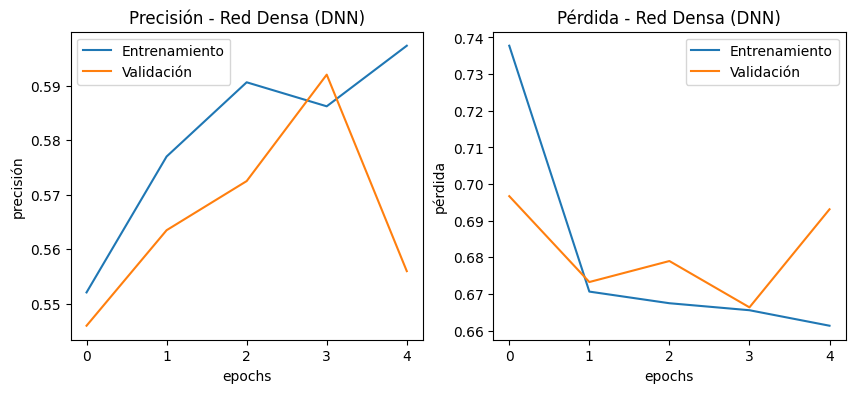

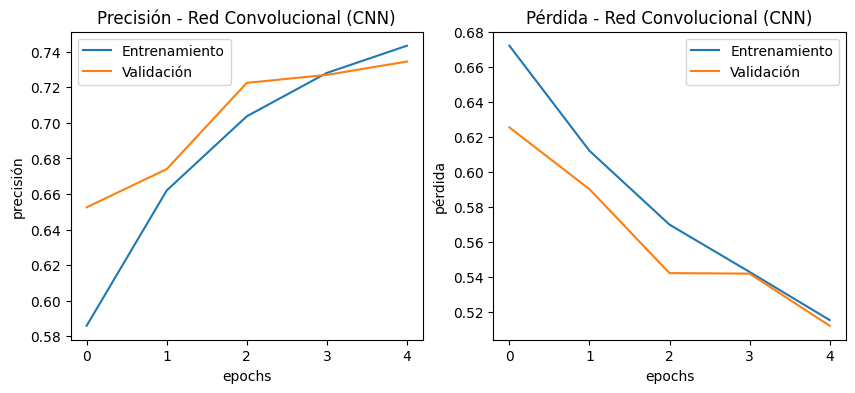

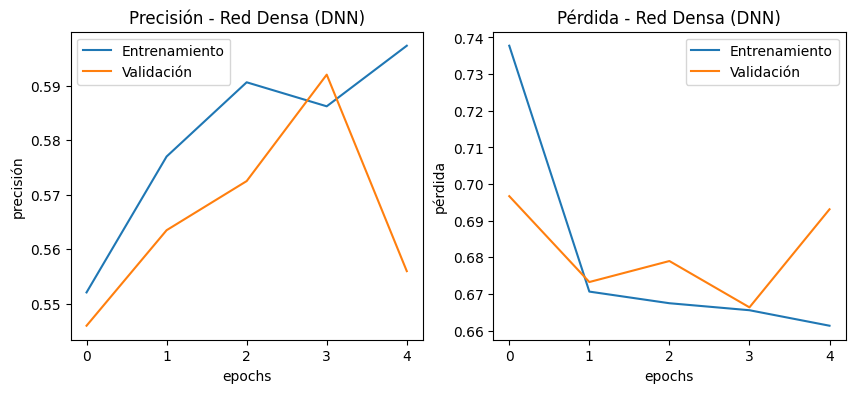

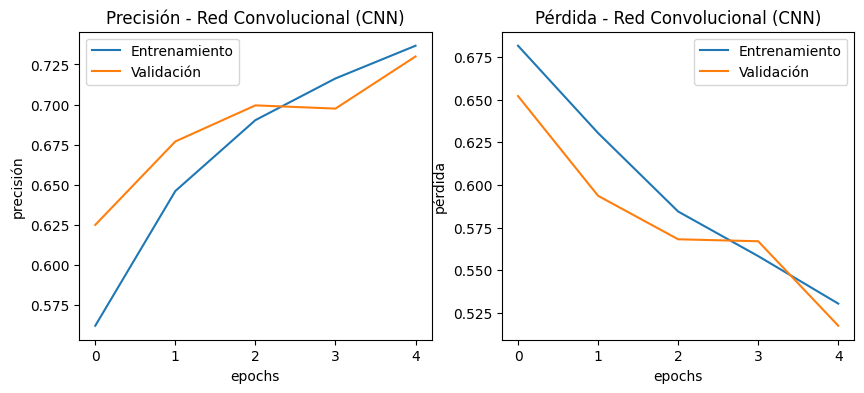

In [195]:
# graficación de precisión y pérdida de entrenamiento
def plot_history(history, title):
  plt.figure(figsize=(10,4))
  # precisión
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'], label='Entrenamiento')
  plt.plot(history.history['val_accuracy'], label='Validación')
  plt.title(f'Precisión - {title}')
  plt.xlabel('epochs')
  plt.ylabel('precisión')
  plt.legend()
  # pérdida
  plt.subplot(1,2,2)
  plt.plot(history.history['loss'], label='Entrenamiento')
  plt.plot(history.history['val_loss'], label='Validación')
  plt.title(f'Pérdida - {title}')
  plt.xlabel('epochs')
  plt.ylabel('pérdida')
  plt.legend()
  # despliegue de gráfico
  plt.show()

plot_history(history_dnn, 'Red Densa (DNN)')
plot_history(history_cnn, 'Red Convolucional (CNN)')

In [196]:
# Evaluar resultados
print('\nEvaluación DNN:')
model_dnn.evaluate(x_test, y_test)

print('\nEvaluación CNN:')
model_cnn.evaluate(x_test, y_test)




Evaluación DNN:
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5550 - loss: 0.7021

Evaluación CNN:
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7280 - loss: 0.5211


[0.5118899345397949, 0.734499990940094]


Evaluación DNN:
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5550 - loss: 0.7021

Evaluación CNN:
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7189 - loss: 0.5276


[0.5174095630645752, 0.7300000190734863]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


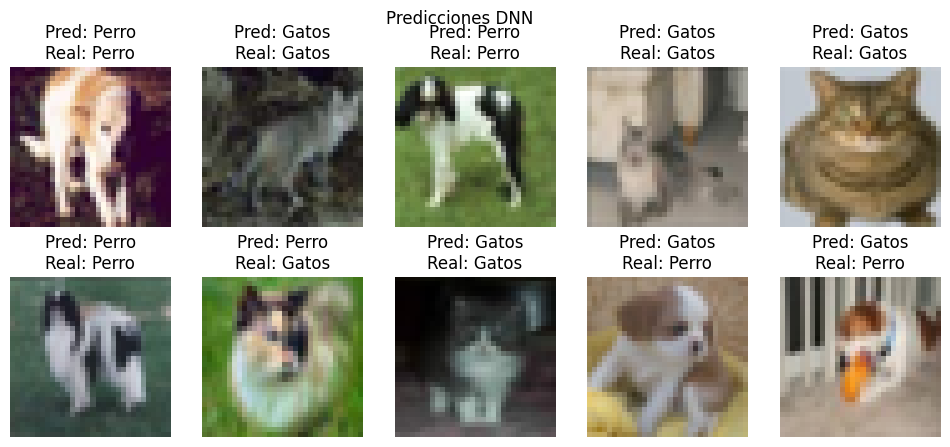

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


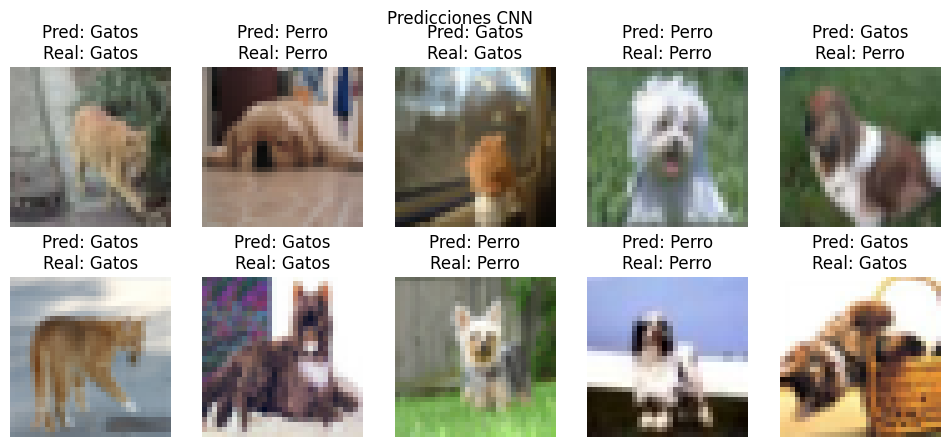

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


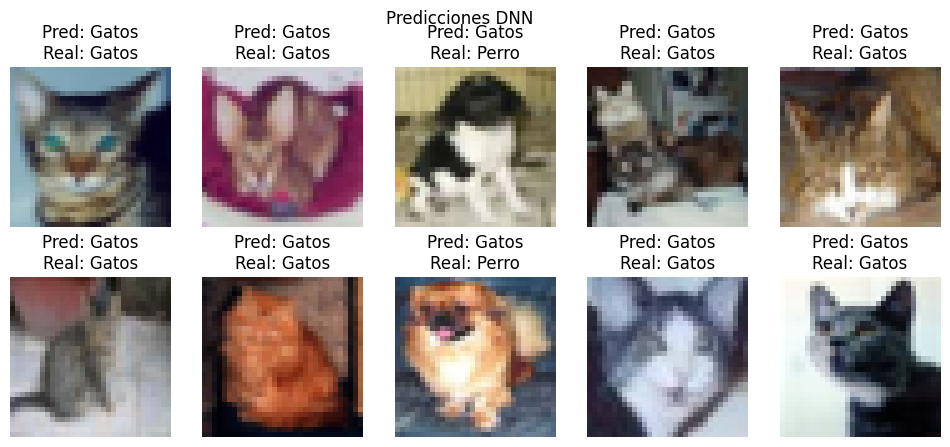

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


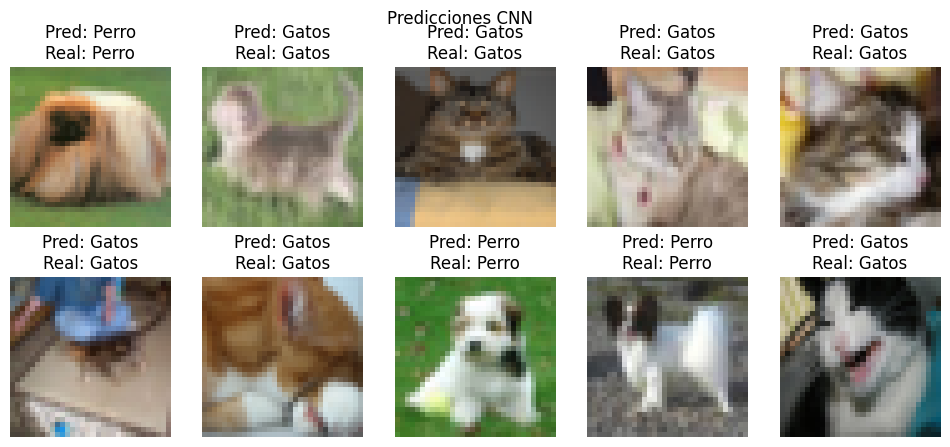

In [197]:
# visualización de algunas predicciones
def show_predictions(model, x_data, y_data, n=10, title="Predicciones"):
  idx = np.random.choice(len(x_data), n)
  preds = (model.predict(x_data[idx]) > 0.5).astype(int)
  fig, axes = plt.subplots(2, n//2, figsize=(12,5))
  for i, ax in enumerate(axes.flat):
    ax.imshow(x_data[idx[i]])
    ax.set_title(f"Pred: {deseado.label if preds[i] == 1 else no_deseado.label}\nReal: {deseado.label if y_data[idx[i]] == 1 else no_deseado.label}")
    ax.axis("off")
  plt.suptitle(title)
  plt.show()

show_predictions(model_dnn, x_test, y_test, title="Predicciones DNN")
show_predictions(model_cnn, x_test, y_test, title="Predicciones CNN")

4. **Uso de nuestra red para una imagen propia**

**Instrucciones**: Sube una fotogrfía de tu mascota y comprueba si tu perro es realmente un perro según la IA o un gato disfrazado.

In [198]:
from google.colab import files
from tensorflow.keras.preprocessing import image

# subir imagen desde tu PC
uploaded = files.upload()

#Mostramos el nombre del archivo subido
for fn in uploaded.keys():
  img_path = fn
  print("Archivo cargado:", img_path)

Saving imagen1.jpg to imagen1 (1).jpg
Archivo cargado: imagen1 (1).jpg


Saving imagen1.jpg to imagen1 (2).jpg
Archivo cargado: imagen1 (2).jpg


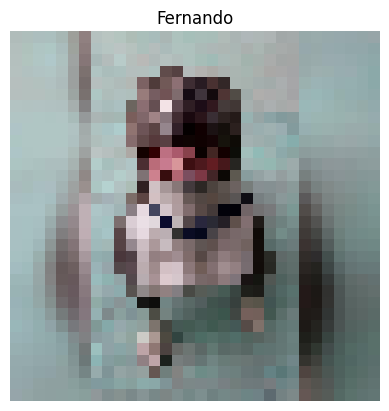

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
Predicción del modelo: Fernando es un Perro


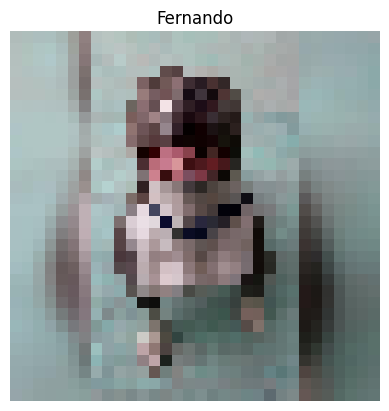

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
Predicción del modelo: Fernando es un Perro


In [199]:
#cargar y preparar la imagen
img = image.load_img(img_path, target_size=(32,32))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0) # forma (1, 32, 32, 3)

plt.imshow(img)
plt.title("Fernando")
plt.axis("off")
plt.show()

# hacer predicción
pred = model_cnn.predict(img_array)[0][0]
label = f"Fernando es un {perros.label if pred > 0.5 else gatos.label}"
print(f"Predicción del modelo: {label}")

5. **Mejora del modelo CNN para mayor precisión**

Implementaremos más capas a nuestro modelo CNN para asegurar una precisión entre el 80% y 90%.

Saving imagen2.jpg to imagen2 (2).jpg
Archivo cargado: imagen2 (2).jpg


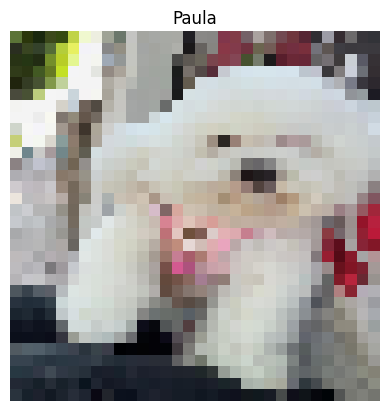

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.5641 - loss: 0.7968 - val_accuracy: 0.5340 - val_loss: 0.6838
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6374 - loss: 0.6562 - val_accuracy: 0.6445 - val_loss: 0.6379
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6950 - loss: 0.5869 - val_accuracy: 0.5930 - val_loss: 0.6622
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7272 - loss: 0.5308 - val_accuracy: 0.7375 - val_loss: 0.5265
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7575 - loss: 0.4964 - val_accuracy: 0.6820 - val_loss: 0.5920
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicción del modelo: Paula es un Perro


In [200]:
from tensorflow.keras import layers, models

# subir imagen desde tu PC
uploaded = files.upload()

#Mostramos el nombre del archivo subido
for fn in uploaded.keys():
  img_path = fn
  print("Archivo cargado:", img_path)

  #cargar y preparar la imagen
img = image.load_img(img_path, target_size=(32,32))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0) # forma (1, 32, 32, 3)

plt.imshow(img)
plt.title("Paula")
plt.axis("off")
plt.show()

improved_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# compilamos CNN
improved_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# alimentamos CNN
improved_history = improved_model.fit(x_train, y_train, epochs=5, batch_size=64,
                                  validation_data=(x_test, y_test), verbose=1)
# hacer predicción
pred = model_cnn.predict(img_array)[0][0]
label = f"Paula es un {perros.label if pred > 0.5 else gatos.label}"
print(f"Predicción del modelo: {label}")